**For the approach evaluation I choose business question no 2.**

<em>Business question 2<br>

Job evaluation and recruitment<br><br>
In KLM we have many different jobs and every job should have a job description and a salary 
scale attached to it. Then if we would like to recruit someone for the specific job a vacancy text 
needs to be written by the hiring manager. This is currently all manual work:
1. Hiring manager creates new function with description
2. Job evaluation consultant evaluates function based on the description and attaches a salary 
scale
3. When there is an open vacancy for the job the hiring manager creates the vacancy text with 
the job role description, requirements, environment and benefits.
4. Candidates hand in resumes and motivation which are evaluated by the hiring manager.
This process takes a lot of time of our managers and a lot of them find it realy hard to come up 
with the right text that leads to the best hires.
Now the business has requested you to see how generative AI can help the managers and job 
evaluation consultants to do this job in a more efficient way and get support in the creation of 
these descriptions.<em>/<br>

Think of questions to ask to the business, possible solutions to the question, 
data you would use, problems/challenges you might encounter, 
models/methods that you would consider, technology you would use, etc.



Before starting the projects I would ask the following questions from the business:<br>
* Are there any desired outcomes by the business of using (Gen)AI? (faster hiring, improved qulity hires, reduced workload, etc)
* Which are currently the most problematic and time consuming steps in the process?
* Are there any standardized templates or formats (perhaps guidelines) for job descriptions or roles accross different departments or functions?
* What are the rules/guidelines for salary scales?
* What are the current metrics, success rates used for the manual processes? (How is effectiveness measured across the steps?)
* What is the volume of new job descriptions and vancancies created per month/year?
* Are there any regulatory and/or compliance concerns/requirements that need to be considered?
* Are there any ethical considerations?
* What are the available data sources(job descriptions, vacancy texts, salary scales, employee performance data)
* What is the budget for this project? (or any other constraints)

This is how I would create a semi-automated pipeline:
1. **Automated Job Description Generation**: hiring manager generates a new functin with description: hiring manager just gives a few bulletpoints,the description is generated by a genai model<br>
    * technology used: GenAI solution with a chosen LLM + RAG (previous descriptions+functions)
    * data used: previous functions and descriptions (perhaps industry benchmark descriptions could be also added)
2. **Automated Salary Scaler**: salary scale is automatically attached by an NLP ML classifier model which is quickly checked by the job evaluation consultant
    * technology used: SVM/RM/GB classifier model
    * Data: NER and tf/idf about the job description
3. **Vacancy Text Generation**: vacancy text is automaticall generated by from the role description, requirements, and benefits; this is then checked by the hiring manager
    * technology: GenAI solution with a chosen LLM + RAG (previous vacancy texts)
    * data: previous vacancy texts, job description texts
4. **Smart Resume Screening**: AI pre screens resumes and motivation letters and highlights/ranks candidates that best fit
    * technology: classification model with NLP (NER + tf/idf) to classify candidates based on the job description and their resumes
    * data: job descriptions, vacancy texts, CVs, motivation letters, successfull applications and resumes
5. **AI-Powered Interview Questions**: Generative LLM model to create interview questions tailored to the job description and candidate's CV
    * technology: LLM + RAG model
    * data: job descriptions, candidate CVs, interview questions

**Extra model**:

This is a possibility which might be worth looking into. As profiling models could be very biased based on data availibility we must be very careful with such models, but when applied the right way it could definitely help the hiring of valuable employees.
Candidates profiling:
* previous job description + vacancy text
* handed in resume and motivation letter
* employee performance reports (after beeing hired)
* the created profiles could be used when ranking the candidates
This model (if used the right way) could add more value as it would also take in consideration the performance of the employee after beeing hired. 
However I cannot stress enough how important it is to make sure that this data is de-biased.


Different data sources I would use:

* **Existing Job Descriptions & Vacancy Texts:** Historical data on KLM jobs and their descriptions.
* **Job Evaluation Data:**  Data from past job evaluations including criteria, scoring, and assigned salary scales, performance reviews, successfull applications, etc per roles/departments)
* **Talent Market Data:**  External data on salaries, skills demand, and industry trends.
* **Company Data:** Internal data on policies, regulations, guidelines, standards, rules, employee performance, skills, and career trajectories.
* **Industry standard job classification systems**


Problems/challenges
Each step it has its own challenges but in every case we should be focusing on:
* **Data Quality and Availability:**  Ensure data is clean, consistent, and relevant for model training. 
* **Bias in AI Output:**  Mitigate potential bias in generated text by carefully curating training data and incorporating human review. 
* **Model Explaworkflowsinability:**  Ensure the AI model's output is transparent and understandable to hiring managers and job evaluation consultants.
* **User Acceptance and Adoption:**  Address concerns and ensure the AI solution is user-friendly and integrated seamlessly into existing .

Technologies (worth considering):
* the pipeline could be running either in cloud environment or on prem
* pipeline orchestration: Airflow
* Docker containers for modularization
* Version tracking: Git
* Models tracking: MLflow, LangSmith, LangFuse
* ML models: SVM/RM/GBC/NB/LR
* LLM frameworks: LangChain, LangGraph, LLamaindex
* CI/CD: Jenkins, Github Actions


Implementation steps:

1. Data collection and preparation
2. Model selection and training
3. Development of user interface
4. Integration with existing systems
5. Pilot testing with a small group of managers
6. Iterative improvement based on feedback
7. Company-wide rollout with training sessions

***

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno

pd.set_option('display.max_columns', None)

In [2]:
# loading CSV in dataframe
df=pd.read_csv("./data/GenderPayGapCase.csv", delimiter=";")

In [3]:
# first look at the dataframe
df.head()

,sex,function,km_transport,nationality,contract_pct,base_salary,clob,nr_managers_above,manager,direct,CLA_domain,grading,maritalstatus,years_of_services,age
0,Man,A330 Tweede Officier,NaN,NL,100,"6,981759595",clob_4,4,0,0,Cockpit,grade_3,Relationship,3,33
1,Man,A330 Tweede Officier,44.0,NL,100,"6,747505918",clob_4,4,0,0,Cockpit,grade_3,Single,0,26
2,Man,A330 Tweede Officier,43.0,NL,100,"7,072163078",clob_4,4,0,0,Cockpit,grade_3,Single,4,27
3,Man,B737 Eerste officier,61.0,NL,100,"7,256418254",clob_4,4,0,0,Cockpit,grade_3,Relationship,=,29
4,Man,B737 Eerste officier,71.0,NL,100,"7,206537057",clob_4,4,0,0,Cockpit,grade_3,Single,4,34


In [4]:
# checking shape of the dataframe
df.shape

(4918, 15)

<Axes: >

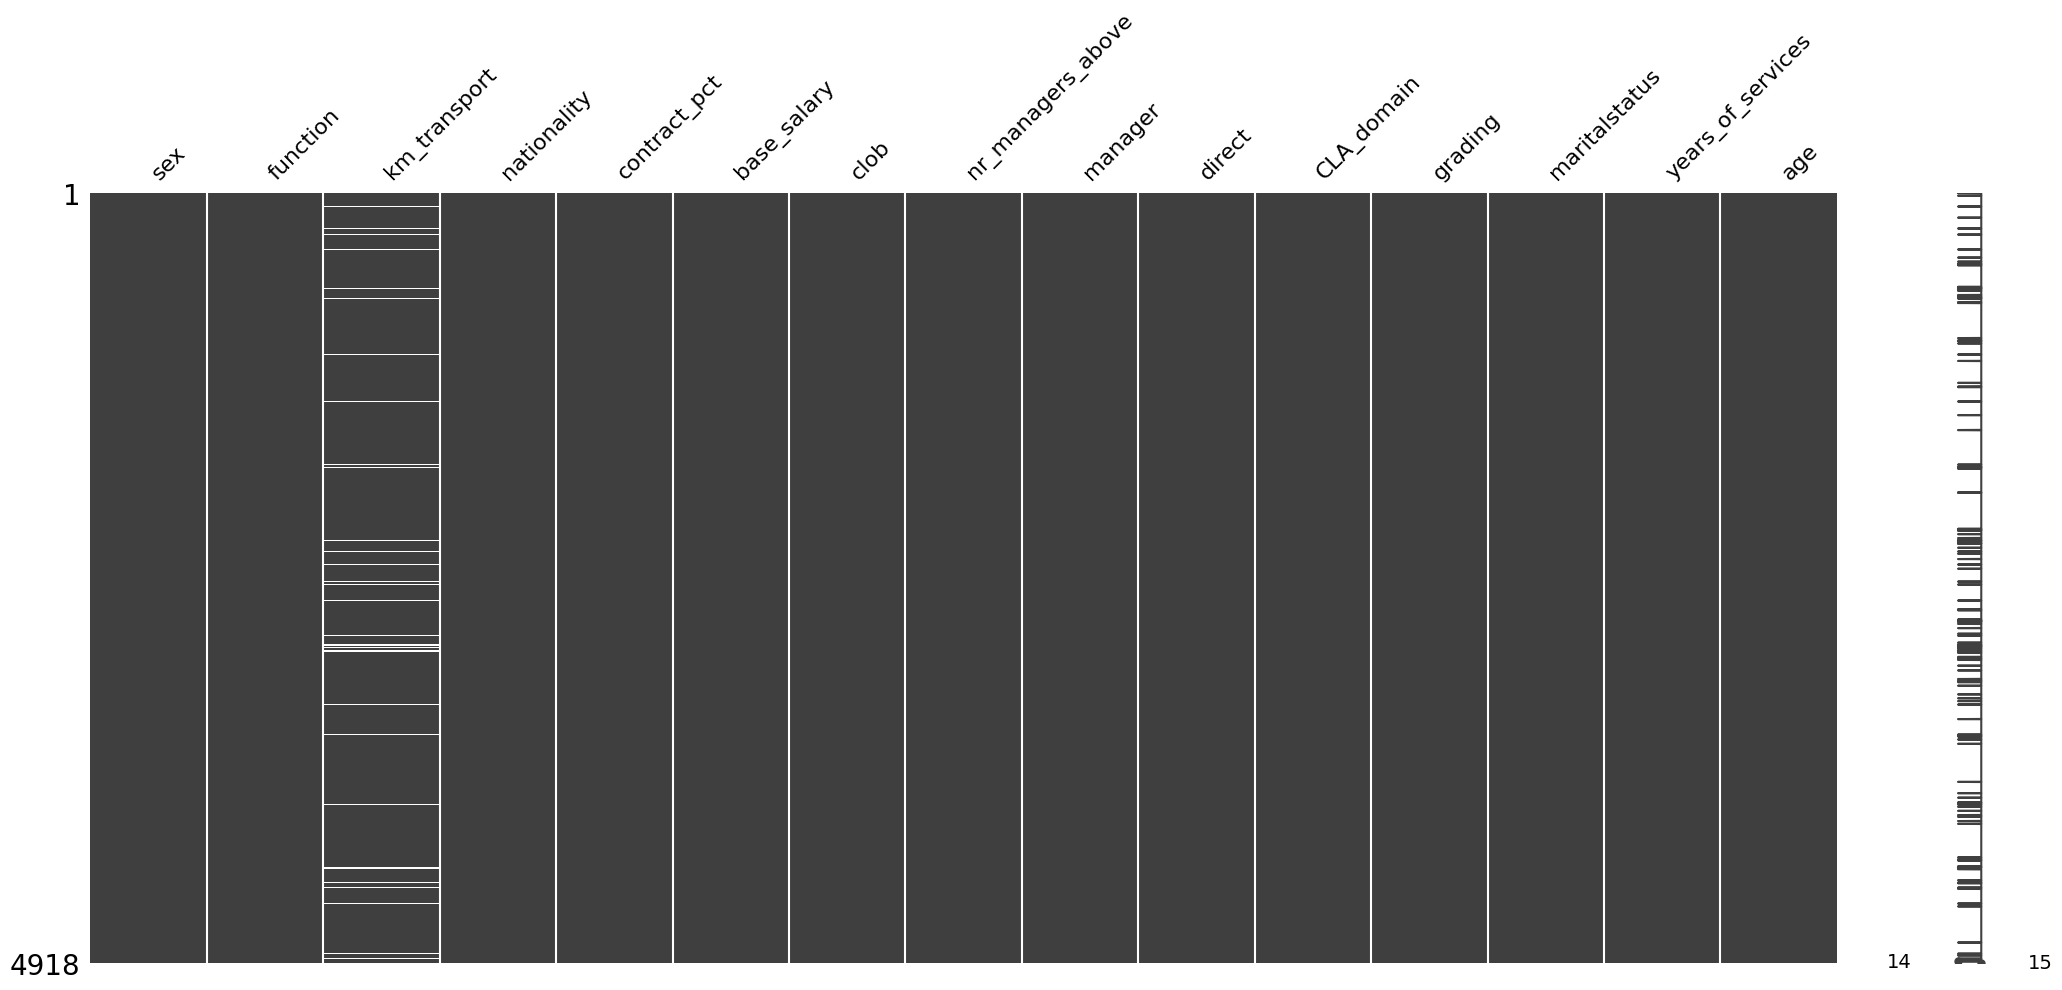

In [5]:
# checking for missing data: km_transport has missing values
msgno.matrix(df)

In [6]:
#checking for number of unique values in the dataframe
 
[[colnames, df[colnames].nunique()] for colnames in df.columns]

[['sex', 2],
 ['function', 21],
 ['km_transport', 237],
 ['nationality', 2],
 ['contract_pct', 20],
 ['base_salary', 1468],
 ['clob', 11],
 ['nr_managers_above', 7],
 ['manager', 2],
 ['direct', 2],
 ['CLA_domain', 4],
 ['grading', 8],
 ['maritalstatus', 3],
 ['years_of_services', 50],
 ['age', 49]]

In [7]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                4918 non-null   object 
 1   function           4918 non-null   object 
 2   km_transport       4765 non-null   float64
 3   nationality        4918 non-null   object 
 4   contract_pct       4918 non-null   object 
 5   base_salary        4918 non-null   object 
 6   clob               4918 non-null   object 
 7   nr_managers_above  4918 non-null   int64  
 8   manager            4918 non-null   int64  
 9   direct             4918 non-null   int64  
 10  CLA_domain         4918 non-null   object 
 11  grading            4918 non-null   object 
 12  maritalstatus      4918 non-null   object 
 13  years_of_services  4918 non-null   object 
 14  age                4918 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 576.5+ KB


* based on the column name and values columns 'contract_pct' and 'years_of_services' should be numbers (integers) -> we need to find out why are they object and transform them to integer types

In [8]:
# as we see the contract_pct columns contains the numbers as text and comma is used as delimiter -> I will change "," to "." so I can transform the type to float
df.contract_pct.unique()
df["contract_pct"]=df["contract_pct"].apply(lambda value: value.replace(",","."))
df["contract_pct"]=df["contract_pct"].astype(float)

In [9]:
# as we see the years_of_services columns contains one value which is not number ("=") therefore I delete this row
# DISCLAIMER: if there was more time available I would have a look on this data as deleting rows might mean getting rid of valuable data; but as the time available is very short I will just delete this row (normally I would use some sort of data imputation and flagging)
print(df.query("years_of_services=='='").shape)
df=df.query("years_of_services!='='")
df["years_of_services"]=df["years_of_services"].astype(int)


(1, 15)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4917 entries, 0 to 4917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                4917 non-null   object 
 1   function           4917 non-null   object 
 2   km_transport       4764 non-null   float64
 3   nationality        4917 non-null   object 
 4   contract_pct       4917 non-null   float64
 5   base_salary        4917 non-null   object 
 6   clob               4917 non-null   object 
 7   nr_managers_above  4917 non-null   int64  
 8   manager            4917 non-null   int64  
 9   direct             4917 non-null   int64  
 10  CLA_domain         4917 non-null   object 
 11  grading            4917 non-null   object 
 12  maritalstatus      4917 non-null   object 
 13  years_of_services  4917 non-null   int64  
 14  age                4917 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 614.6+ KB


In [11]:
df["base_salary"]=df["base_salary"].apply(lambda value: value.replace(",","")).astype(int)
df["sex"]=df["sex"].apply(lambda sex: "male" if sex=="Man" else "female")

### VISULIZATIONS ###

In [12]:
male_color="cornflowerblue"
female_color="navajowhite"

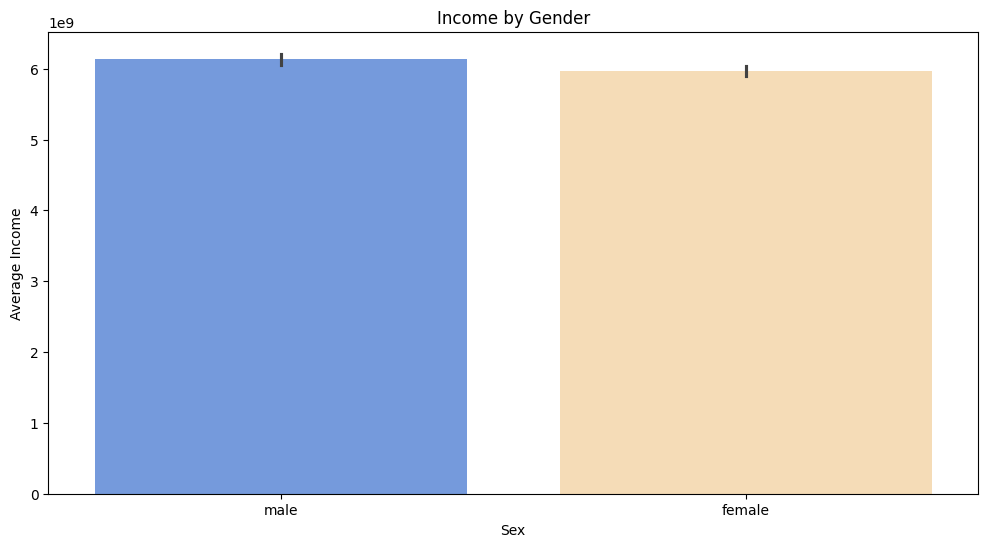

In [13]:

# first let us see the average income by sex
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='base_salary', data=df, hue='sex', palette={'male': male_color, 'female': female_color})
plt.title('Income by Gender')
plt.xlabel('Sex')
plt.ylabel('Average Income')
plt.show()

In [14]:
df.groupby(["sex"])["base_salary"].mean()

sex
female    5.968043e+09
male      6.134704e+09
Name: base_salary, dtype: float64

As we can see on average the male base salary is by 3% higher than the average female salary. 

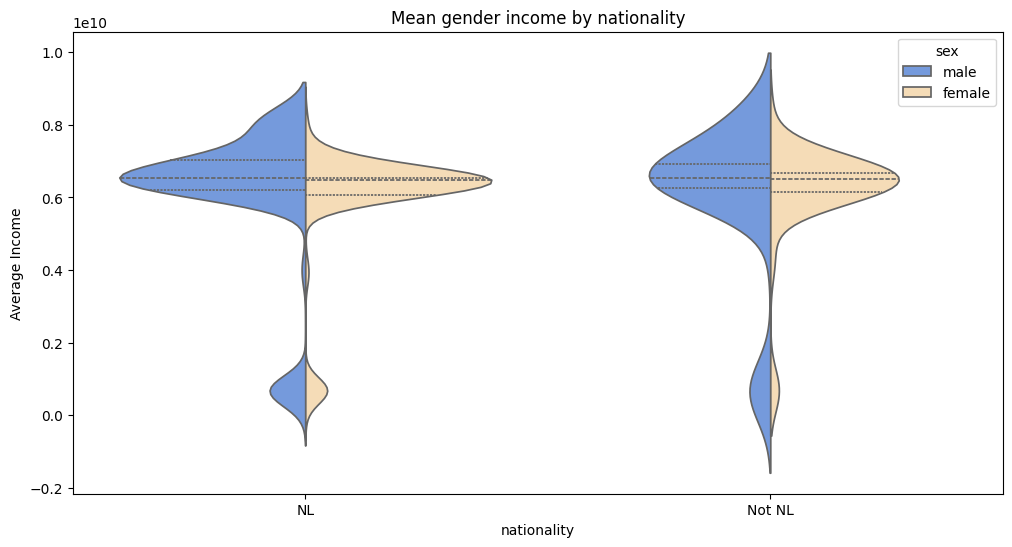

nationality
nationality sex                
NL          female         2171
            male           2556
Not NL      female           75
            male            115

In [15]:
# let us first see how do the average salaries look like when comparing nationality categories
x_axis="nationality"
sex_col_name="sex"

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color})
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

pd.DataFrame(df.groupby([x_axis,sex_col_name])[x_axis].count())

As we can see, based on the average female and male salaries grouped by nationality:
* for NL nationalities females are in disadvantage as they make less than their males counterparties
* for non-NL nationalities there is almost no difference however there are not so many observations

In [16]:
# I create categories for contract percentage for easier evaluation
def contract_divide(perc):
    
    match perc:
        case perc if perc <=25:
            return "first_quartile"
        case perc if perc <=50:
            return "second_quartile"
        case perc if perc <=75:
            return "third_quartile"
        case perc if perc <=100:
            return "fourth_quartile"
        case _:
            return "unknown"
        

df["contract_quartiles"]=df["contract_pct"].apply(contract_divide)

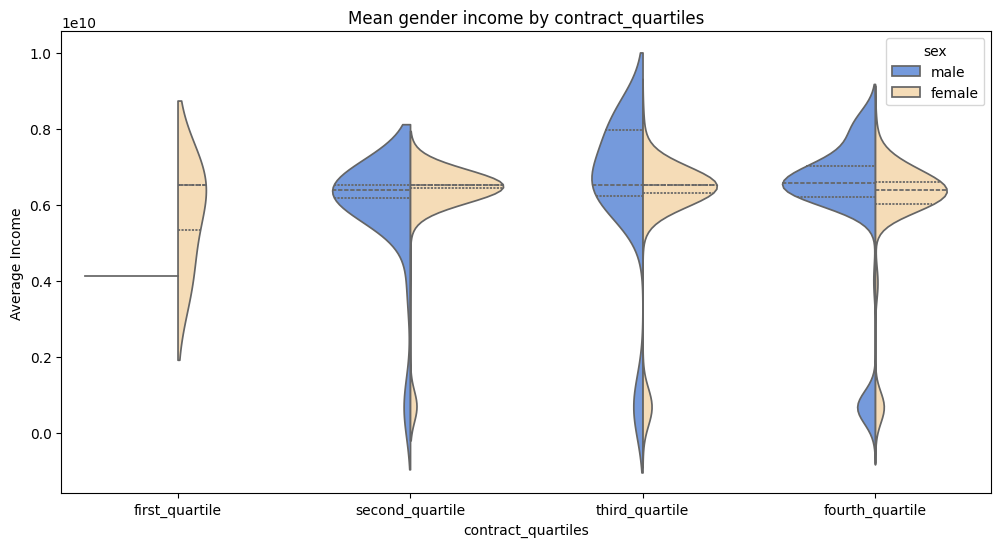

/tmp/ipykernel_14237/2973437992.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


contract_quartiles
first_quartile  male                     2
                female                   3
second_quartile male                    28
                female                 432
third_quartile  male                   111
                female                 628
fourth_quartile male                  2530
                female                1183

In [17]:
# let us see how do the average salaries look like when comparing with contract_quartiles categories

x_axis="contract_quartiles"
sex_col_name="sex"

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=['first_quartile', 'second_quartile', 'third_quartile', 'fourth_quartile'])
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

desired_order_x_axis = ['first_quartile', 'second_quartile', 'third_quartile', 'fourth_quartile']
desired_order_sex_col_name = ['male', 'female']

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

As we can see in case of fourth quartile contract percentages (which are contract percentages above 75%) females on average make slightly less than males.

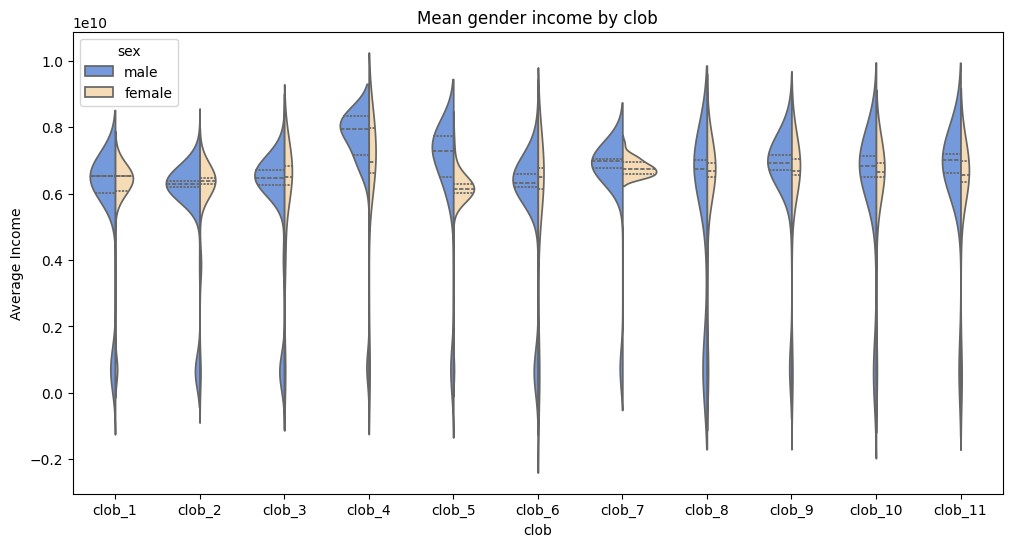

/tmp/ipykernel_14237/2924393208.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


clob
clob_1  male     303
        female  1465
clob_2  male     509
        female   217
clob_3  male     625
        female    50
clob_4  male     481
        female    44
clob_5  male     187
        female   195
clob_6  male     229
        female    36
clob_7  male     136
        female    34
clob_8  male      60
        female    61
clob_9  male      67
        female    51
clob_10 male      51
        female    32
clob_11 male      23
        female    61

In [18]:
x_axis="clob"
sex_col_name="sex"

desired_order_x_axis = ['clob_1', 'clob_2', 'clob_3', 'clob_4','clob_5', 'clob_6', 'clob_7', 'clob_8', 'clob_9', 'clob_10', 'clob_11']
desired_order_sex_col_name = ['male', 'female']

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=desired_order_x_axis)
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

As we can see for clob_5 females are making considerably less than in case of males.

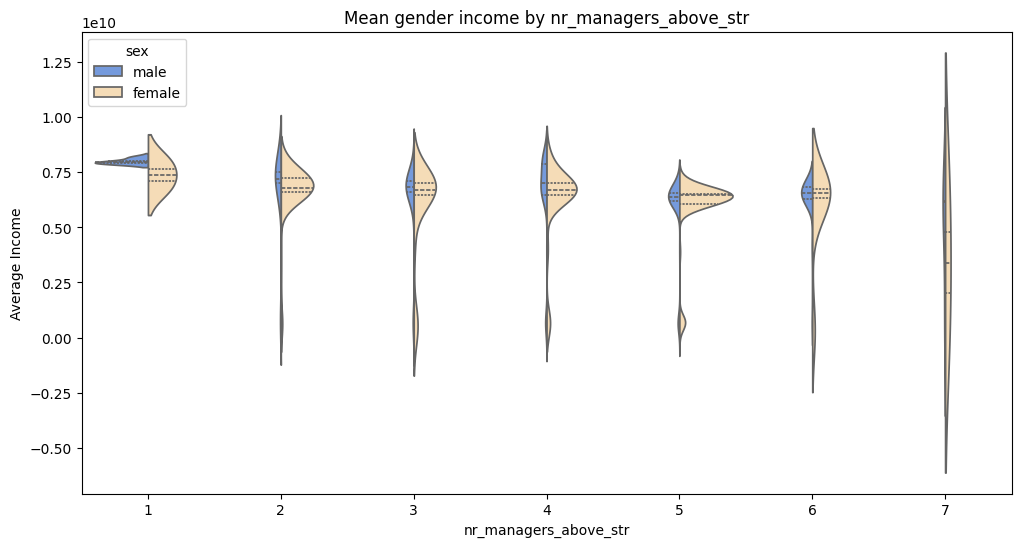

/tmp/ipykernel_14237/1703375255.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


nr_managers_above_str
1 male                        4
  female                      2
2 male                       46
  female                     28
3 male                      168
  female                     99
4 male                     1116
  female                    219
5 male                     1291
  female                   1880
6 male                       42
  female                     16
7 male                        4
  female                      2

In [19]:
df['nr_managers_above_str']=df['nr_managers_above'].astype(str)

x_axis="nr_managers_above_str"
sex_col_name="sex"

desired_order_x_axis = ['1', '2', '3', '4','5', '6', '7']
desired_order_sex_col_name = ['male', 'female']

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=desired_order_x_axis)
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

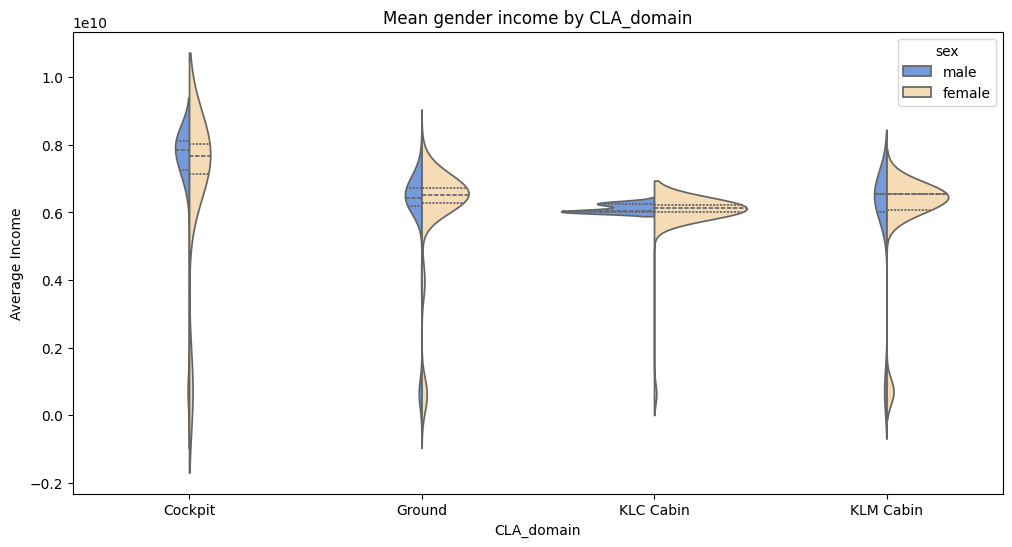

/tmp/ipykernel_14237/729619829.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


CLA_domain
Cockpit   male           585
          female          37
Ground    male          1766
          female         621
KLC Cabin male            24
          female         134
KLM Cabin male           296
          female        1454

In [20]:

x_axis="CLA_domain"
sex_col_name="sex"

desired_order_x_axis = ['Cockpit', 'Ground', 'KLC Cabin', 'KLM Cabin']
desired_order_sex_col_name = ['male', 'female']

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=desired_order_x_axis)
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

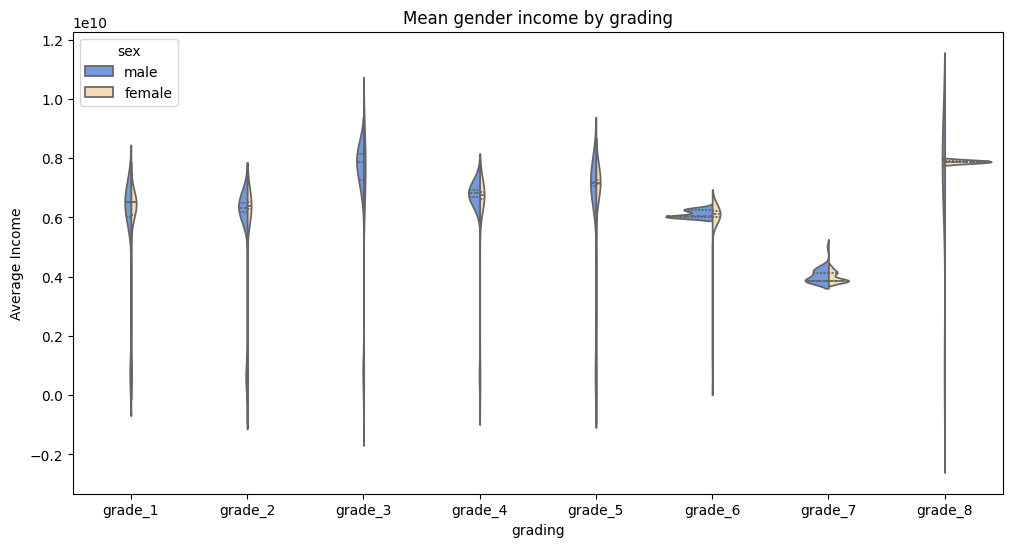

/tmp/ipykernel_14237/3300870946.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


grading
grade_1 male        296
        female     1454
grade_2 male       1161
        female      343
grade_3 male        585
        female       37
grade_4 male        406
        female      191
grade_5 male        155
        female       55
grade_6 male         24
        female      134
grade_7 male         32
        female       30
grade_8 male         12
        female        2

In [21]:

x_axis="grading"
sex_col_name="sex"

desired_order_x_axis = ['grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8']
desired_order_sex_col_name = ['male', 'female']

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=desired_order_x_axis)
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

In [22]:
def years_to_cat(num):
    
    match num:
        case num if num <=10:
            return "0_10"
        case num if num <=20:
            return "10_20"
        case num if num <=30:
            return "20_30"
        case num if num <=40:
            return "30_40"
        case num if num <=50:
            return "40_50"
        case _:
            return 'unknown'
        
df["years_cat"]=df["years_of_services"].apply(years_to_cat)

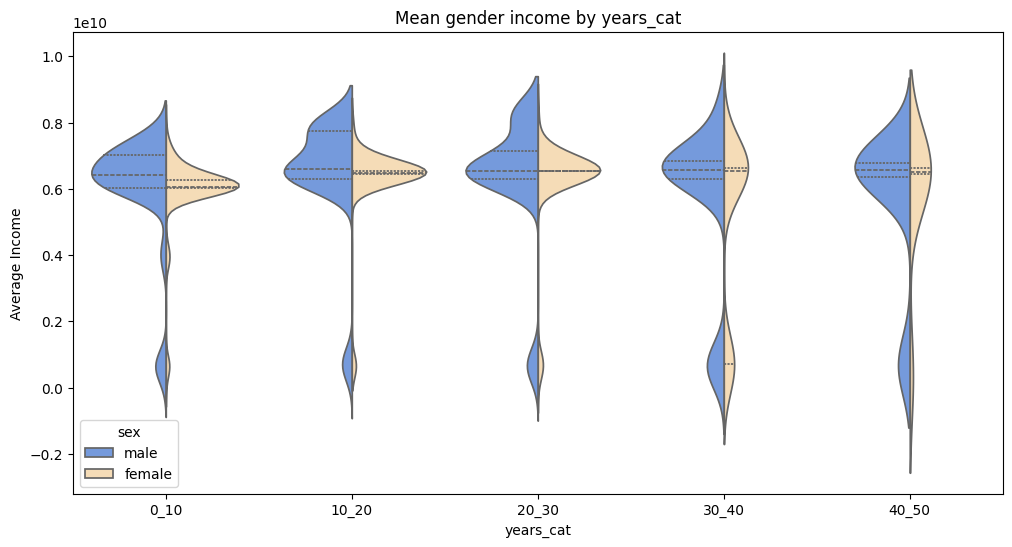

/tmp/ipykernel_14237/1085326769.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


years_cat
0_10  male          730
      female        703
10_20 male          616
      female        569
20_30 male          697
      female        675
30_40 male          534
      female        284
40_50 male           94
      female         15

In [23]:
x_axis="years_cat"
sex_col_name="sex"

desired_order_x_axis = ['0_10', '10_20', '20_30', '30_40', '40_50']
desired_order_sex_col_name = ['male', 'female']

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=desired_order_x_axis)
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

In case of years spent with the company up until 30 years woman make less on average than males.

In [24]:
def age_to_cat(num):
    
    match num:
        case num if num <=25:
            return "0_25"
        case num if num <=35:
            return "25_35"
        case num if num <=45:
            return "35_45"
        case num if num <=55:
            return "45_55"
        case num if num <=70:
            return "55_70"
        case _:
            return 'unknown'
        
df["age_cat"]=df["age"].apply(age_to_cat)

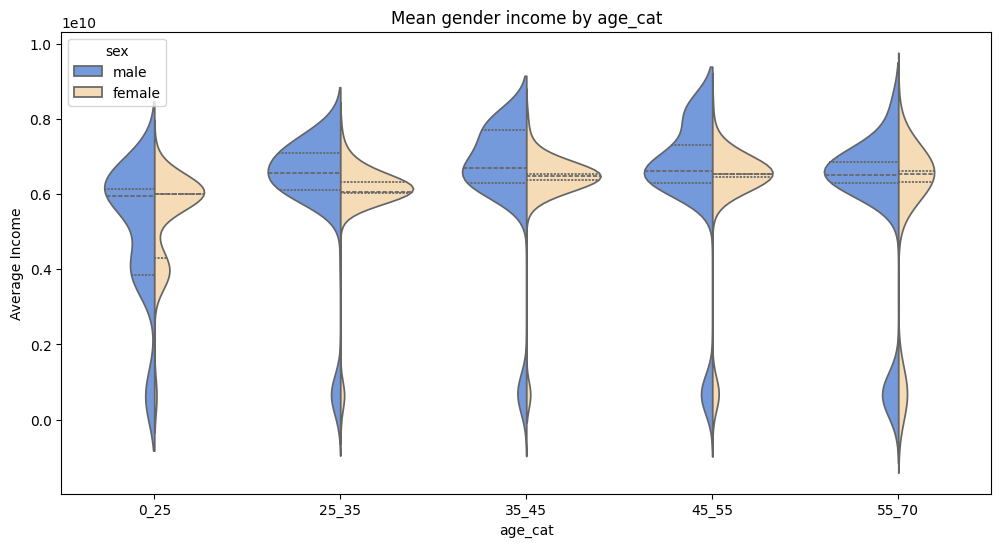

/tmp/ipykernel_14237/3992044640.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


age_cat
0_25  male        107
      female      127
25_35 male        426
      female      436
35_45 male        499
      female      495
45_55 male        794
      female      806
55_70 male        845
      female      382

In [25]:
x_axis="age_cat"
sex_col_name="sex"

desired_order_x_axis = ['0_25', '25_35', '35_45', '45_55', '55_70']
desired_order_sex_col_name = ['male', 'female']

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=desired_order_x_axis)
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

Woman between 25-35 years old make less than males.

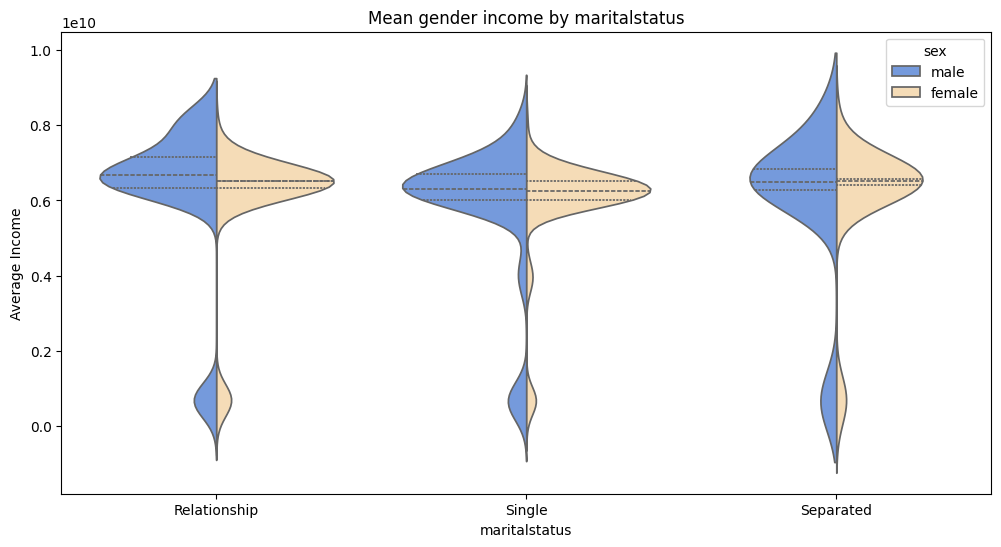

/tmp/ipykernel_14237/2615567222.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())


maritalstatus
Relationship male             1852
             female           1277
Single       male              674
             female            783
Separated    male              145
             female            186

In [26]:
x_axis="maritalstatus"
sex_col_name="sex"

desired_order_x_axis = ['Relationship', 'Single', 'Separated']
desired_order_sex_col_name = ['male', 'female']

plt.figure(figsize=(12, 6))
sns.violinplot(x=x_axis, y='base_salary', data=df, hue=sex_col_name, split=True, inner='quart',palette={'male': male_color, 'female': female_color},
               order=desired_order_x_axis)
plt.title(f'Mean gender income by {x_axis}')
plt.xlabel(x_axis)
plt.ylabel('Average Income')
plt.show()

x_axis_cat = pd.Categorical(df[x_axis], categories=desired_order_x_axis, ordered=True)
sex_col_name_cat = pd.Categorical(df[sex_col_name], categories=desired_order_sex_col_name, ordered=True)

# Perform groupby on the categorical columns
pd.DataFrame(df.groupby([x_axis_cat, sex_col_name_cat])[x_axis].count())

GENERAL OBSERVATIONS:

Females who:
* are in a relationship
* are aged between 25-35 years
* are working less then 10 years for the company
* have 4 manager above
* are working for clob_4 or clob_5 or clob_7
... are making less than their male counterparts.

Males who:
* are working on the ground
* are working for clob_2
* are working in KLC Cabin
... are making less than their female counterparts.

## Modelling ##

In [138]:
# I would have worked with the function column as well, as it contains a lot of valuable data but because the lack of time I decided to omit it. However with regex a lot of useful information could be extracted!

In [27]:
# as we see the km_transport columns contains 153 (3%) NaN values therefore I delete these row
# DISCLAIMER: if there was more time available I would have a look on these missing data as deleting rows might mean getting rid of valuable data; 
# but as the time available is very short I will just delete this row (normally I would use some sort of data imputation and flagging)

df=df.query("km_transport.notna()", engine="python")

In [31]:
# let's address now the categorical data:
# sex, nationality contains two walues so we can easily create a binary column


df["male"]=df["sex"].apply(lambda male: 1 if male=="Man" else 0)
df["dutch"]=df["nationality"].apply(lambda dutch: 1 if dutch=="NL" else 0)
df.drop(columns=["sex", "nationality"], inplace=True)

In [28]:
# one hot encoding of categorical data

df=pd.get_dummies(df, prefix_sep="_", columns=["maritalstatus","CLA_domain", 'clob', "grading", 'nr_managers_above_str', 'contract_quartiles', 'years_cat', 'age_cat'],  dtype=int)

In [34]:
# selecting columns for modelling
model_columns= ['km_transport', 'manager', 'direct', 'maritalstatus_Relationship', 'maritalstatus_Separated',
       'maritalstatus_Single', 'CLA_domain_Cockpit', 'CLA_domain_Ground',
       'CLA_domain_KLC Cabin', 'CLA_domain_KLM Cabin', 'clob_clob_1',
       'clob_clob_10', 'clob_clob_11', 'clob_clob_2', 'clob_clob_3',
       'clob_clob_4', 'clob_clob_5', 'clob_clob_6', 'clob_clob_7',
       'clob_clob_8', 'clob_clob_9', 'grading_grade_1', 'grading_grade_2',
       'grading_grade_3', 'grading_grade_4', 'grading_grade_5',
       'grading_grade_6', 'grading_grade_7', 'grading_grade_8',
       'nr_managers_above_str_1', 'nr_managers_above_str_2',
       'nr_managers_above_str_3', 'nr_managers_above_str_4',
       'nr_managers_above_str_5', 'nr_managers_above_str_6',
       'nr_managers_above_str_7', 'contract_quartiles_first_quartile',
       'contract_quartiles_fourth_quartile',
       'contract_quartiles_second_quartile',
       'contract_quartiles_third_quartile', 'years_cat_0_10',
       'years_cat_10_20', 'years_cat_20_30', 'years_cat_30_40',
       'years_cat_40_50', 'age_cat_0_25', 'age_cat_25_35', 'age_cat_35_45',
       'age_cat_45_55', 'age_cat_55_70', 'dutch', 'base_salary', 'male']

model_df=df[model_columns]

### Base salary model -> regression ###

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_absolute_error,
    r2_score,
    mean_squared_error,
    precision_score,
    recall_score,
    f1_score)

In [63]:
def evaluate_regression_model(model, X, y):
    """Evaluate regression models.

    Parameters
    ----------
    model : estimator instance
        Fitted regressor.
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Input values.
    y : array-like of shape (n_samples,)
        Target values.
    """
    y_pred = model.predict(X)
    print(f"R^2 : {r2_score(y, y_pred):.2f}")
    print(f"MAE : {mean_absolute_error(y, y_pred):,.0f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):,.0f}")

In [72]:
label_column="base_salary"
X=model_df.drop(columns=[label_column])
y=df[label_column]

rand_state=42

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rand_state)

In [87]:
reg_models = {  "linear_reg": {
                "pipeline": [
                    ("scaler", StandardScaler()),
                    ("regressor", LinearRegression()),
                ],
                "type": "regressor",
            },
            "rf_reg": {
                "pipeline": [
                    ("regressor", RandomForestRegressor(random_state=rand_state)),
                ],
                "type": "regressor",
            },
            "gbr_reg": {
                "pipeline": [
                    ("regressor", GradientBoostingRegressor(random_state=rand_state)),
                ],
                "type": "regressor",
            },
            "svr_reg": {
                "pipeline": [
                    ("regressor", SVR()),
                ],
                "type": "regressor",
            }
        }

pipe_dict = reg_models

In [89]:
model_name="linear_reg"
model = Pipeline(pipe_dict[model_name]["pipeline"]).fit(X_train, y_train)
evaluate_regression_model(model, X_test, y_test)

R^2 : 0.13
MAE : 1,029,851,593
RMSE: 1,777,466,263


In [88]:
model_name="rf_reg"
model = Pipeline(pipe_dict[model_name]["pipeline"]).fit(X_train, y_train)
evaluate_regression_model(model, X_test, y_test)

R^2 : 0.02
MAE : 1,036,604,908
RMSE: 1,886,572,431


In [90]:
model_name="gbr_reg"
model = Pipeline(pipe_dict[model_name]["pipeline"]).fit(X_train, y_train)
evaluate_regression_model(model, X_test, y_test)

R^2 : 0.16
MAE : 1,002,605,725
RMSE: 1,749,203,207


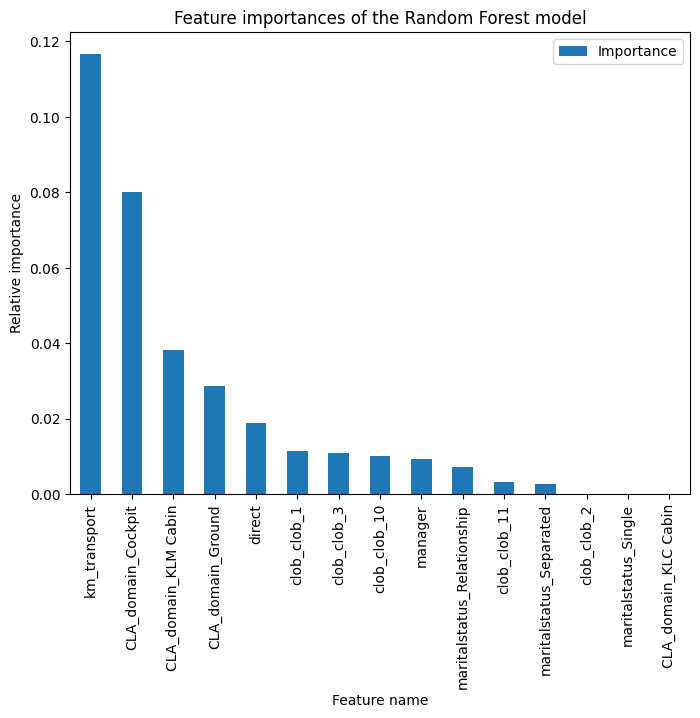

In [95]:
get_feat_imps(pipe_dict, "gbr_reg")

In [96]:
def get_feat_imps(pipe_dict, regressor):
    pipe = Pipeline(pipe_dict[regressor]["pipeline"])

    feat_importances = pd.DataFrame(
        pipe.steps[0][1].feature_importances_[:15],
        index=X_train.columns[:15],
        columns=["Importance"],
    )
    feat_importances.sort_values(by="Importance", ascending=False, inplace=True)
    feat_importances.plot(kind="bar", figsize=(8, 6))
    plt.title("Feature importances of the Random Forest model")
    plt.ylabel("Relative importance")
    plt.xlabel("Feature name")
    plt.show()

As we can see the model performs very poorly. It is natural as there was no proper feature engineering made, hyperparamter tuning. Also the results are not cross validated. 
This model tries to predict the base salary based on the features. In case of a model with good prediction power we could see the feature importances and if gender would be in the top feature importances we could assume that gender does play an important role.
<br>As I have no time anymore I cannot go on with feature engineering (dimensionality reduction) and fine tuning of the model. I would even create a model which would be a classifier on predicting if the employee is male or female.
<br><br>Of course during an interview session I could elaborate on my approach and next things to do. :)